In [1]:
#create the environnmnet
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from IPython import display

D:\python\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.
D:\python\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Data distribution')

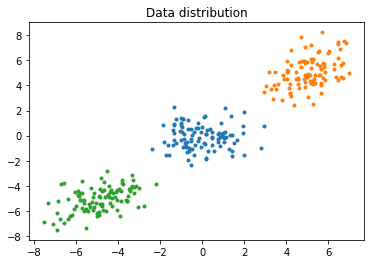

In [2]:
#The data
#method 1:create data by myself, Gaussian
mu1 = [0,0]
sigma1 = [[1,0],[0,1]]
mu2 = [5,5]
sigma2 = [[1,1],[0,1]]
mu3 = [-5,-5]
sigma3 = [[1,0],[1,1]]
data1 = np.random.multivariate_normal(mu1,sigma1,100)
data2 = np.random.multivariate_normal(mu2,sigma2,100)
data3 = np.random.multivariate_normal(mu3,sigma3,100)
data = np.vstack((data1,data2,data3))
plt.figure()
plt.plot(data1[:,0],data1[:,1],'.')
plt.plot(data2[:,0],data2[:,1],'.')
plt.plot(data3[:,0],data3[:,1],'.')
plt.title('Data distribution')

#method 2:read in the data
##data = pd.read()

Text(0.5, 1.0, 'data and grid')

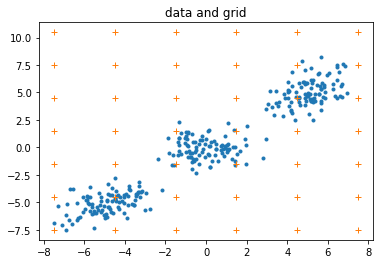

In [3]:
#sliding window
#prepare 
#step1, find the maximum and minimum points in the dataset, in order to set a lot of random center points
top = np.max(data[:,1])
bottom = np.min(data[:,1])
right = np.max(data[:,0])
left = np.min(data[:,0])
length = right - left
width = top - bottom

#step2, set the parameters
r = 3 #the radius of each random circle area
minpoints = 2 #the minimum number of points in each circle(slideing windows)

#step3, create a center points grid based on r and parameters in step1
grid = np.zeros((np.int((length+2*r)/r)*np.int((width+2*r)/r),2))
for i in range(np.int((length+2*r)/r)):
    for j in range(np.int((width+2*r)/r)):
        grid[(i)*np.int((width+2*r)/r) + j] = [left + i*r,bottom + j*r]

plt.figure()
plt.plot(data[:,0],data[:,1],'.')
plt.plot(grid[:,0],grid[:,1],'+')
plt.title('data and grid')

Text(0.5, 1.0, 'only useful center point')

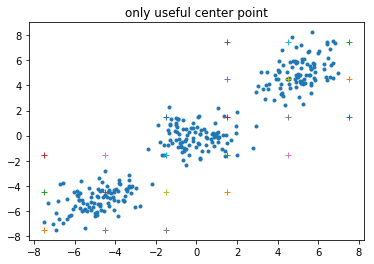

In [7]:
#calculate Euclidian distance
def Euclidian(a,b):
    s = 0
    if len(a) != len(b):
        print('Can not use Euclidian, two vectors have different number of elements!')
        return
    for i in range(len(a)):
        s += (a[i] - b[i])*(a[i] - b[i])
    return np.sqrt(s)

#define Gaussian kernal function
def Kernal_Gaussian(x,sigma):
    #x = np.linalg.norm((center-point))*np.linalg.norm((center-point))
    x1 = np.linalg.norm(x)*np.linalg.norm(x)
    return np.exp(-x1/(4*sigma*sigma))
    
    
#sliding window    
edge = np.zeros((np.int((length+2*r)/r)*np.int((width+2*r)/r))) # this vector is used to save how many points in each circle area
edge_points = [[] for i in range(len(edge))]# this is used to save the index of data points in each circle area 
data_copy = np.zeros(len(data))
for i in range(np.int((length+2*r)/r)):
    for j in range(np.int((width+2*r)/r)):
        index = i*np.int((width+2*r)/r) + j #calculate the index of each grid center point
        for t in range(len(data_copy)):
                #if data_copy[t] != 1:
                    if Euclidian(grid[index],data[t]) < r: 
                        #edge[index] += 1
                        edge_points[index].append(t)
                        #print("t = ",t,', index =', index )
                        data_copy[t] = 1#index
#determine which point is edge point
#index_use = []
plt.figure()
plt.plot(data[:,0],data[:,1],'.')
for i in range(np.int((length+2*r)/r)):
    for j in range(np.int((width+2*r)/r)):
        index = i*np.int((width+2*r)/r) + j
        if len(edge_points[index]) > minpoints:#edge[index] > minpoints:
            #index_use.append(index)
            plt.plot(grid[index,0],grid[index,1],'+')
plt.title('only useful center point') #means only the center points which circle area have at least "minpoints = 2" points will be shown

Text(0.5, 1.0, 'only center point')

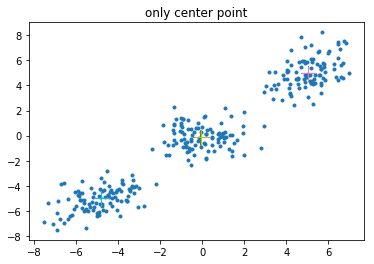

In [8]:
edge1 = edge
edge_points1 = edge_points
grid1 = grid #copy the original data
plt.figure()
for k in range(10): #repeat 10 times, each time we will move every already shown center points for one step
    #vector = [0]*len(data[0])
    for i in range(len(edge1)):
        #print(edge1[i] > minpoints)
        #if len(edge_points1[i]) > minpoints: #if the grid point is not an edge point, add this line will find edge center points
            s = np.zeros(len(grid[0]))
            t = 0
            m = 0
            for j in range(len(edge_points1[i])):  #calculate direction vectors and determine the new center points
                m = Kernal_Gaussian((data[edge_points1[i][j]]-grid1[i])/r,r)  #use gaussian kernal function
                t = t + m
                s = s + data[edge_points1[i][j]]*m
            grid1[i] = s/t #generate new center point
            #edge1[i] = 0
            edge_points1[i] = []
            for t in range(len(data)): #use the new center point to calculate which data point is in this new circle area
                if Euclidian(grid1[i],data[t]) < r: 
                        edge_points1[i].append(t) #save the index of data point, because this is much faster than save the point
    plt.ion()
    plt.cla()
    plt.plot(data[:,0],data[:,1],'.')
    for i in range(len(edge1)):
        if len(edge_points1[i])>0:
            plt.plot(grid1[i,0],grid1[i,1],'+',markersize = 10)
            plt.title('only center point')
    plt.pause(1)
    display.clear_output(wait=True)
plt.ioff()

#show the final figure
plt.figure()
plt.plot(data[:,0],data[:,1],'.')
for i in range(len(edge1)):
    if len(edge_points1[i])>0:#edge[i] > minpoints:
        #print(1)
        #index_use.append(index)
        plt.plot(grid1[i,0],grid1[i,1],'+',markersize = 15)
plt.title('only center point')

In [ ]:
#and finally you can find a lot of different grid points locate in a same place, use their index and their original 
#location (savd in matrix "grid"), you can know the area of each cluster and how many clusters this dataset have.